# Extracting Data Pipeline
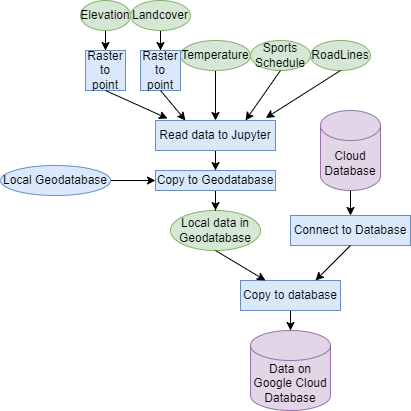

## Import Statments

In [1]:
import os
import arcpy

## File Path

In [2]:
#location to current directory
file_path = os.path.dirname(arcpy.mp.ArcGISProject('CURRENT').filePath)
os.chdir(file_path)
#absolute Path for geodatabase
arcpy.env.workspace = file_path
arcpy.management.CreateFileGDB(file_path, "Lab2")

<Result 'C:\\Users\\Track\\OneDrive\\Documents\\ArcGIS\\Projects\\ArcIILab2\\Lab2.gdb'>

## Connection to Cloud Database

In [3]:
#create connection to cloud database (On google cloud-- SQL database)
out_folder_path = arcpy.env.workspace
out_name = "Lab2.sde"
database_platform = "POSTGRESQL"
instance = "35.232.21.197"
account_authentication = "DATABASE_AUTH"
username = "postgres"
password = "loganandgreg"
save_user_pass = "SAVE_USERNAME"
database = "gis5572"
#actual database connection
arcpy.management.CreateDatabaseConnection(out_folder_path, out_name, database_platform, instance, account_authentication, username, password, save_user_pass, database)

<Result 'C:\\Users\\Track\\OneDrive\\Documents\\ArcGIS\\Projects\\ArcIILab2\\Lab2.sde'>

## Copy Data to Geodatabase / Raster Conversions

In [4]:
#put everything into local geodatabase and cloud database
gdb_path = file_path
arcpy.env.workspace = gdb_path + "\Lab2.gdb"
#construct paths 
input_raster1 = os.path.join(gdb_path, "MN_Geo_Data", "elev_30m_digital_elevation_model.gdb", "digital_elevation_model_30m")
input_raster2 = os.path.join(gdb_path, "MN_Geo_Data", "NLCD_2019_Land_Cover.tif")
input_table1 = os.path.join(gdb_path, "TMIN_TMAX.csv")
input_table2 = os.path.join(gdb_path, "filtered_schedule.csv")
input_line1 = os.path.join(gdb_path, "no_traffic_lines.shp")
input_line2 = os.path.join(gdb_path, "traffic_lines.shp")
#file path for resampled points
output_raster1 = os.path.join(gdb_path, "Lab2.gdb", "elevation_sampled")
output_points1 = os.path.join(gdb_path, "Lab2.gdb", "elevation_point")
output_raster2 = os.path.join(gdb_path, "Lab2.gdb", "landcover_sampled")
output_points2 = os.path.join(gdb_path, "Lab2.gdb", "landcover_point")

#making cell size bigger
arcpy.management.Resample(
    in_raster=input_raster1,
    out_raster=output_raster1,
    cell_size="9000 9000",
    resampling_type="MAJORITY")
print("raster1_resampled")
arcpy.management.Resample(
    in_raster=input_raster2,
    out_raster=output_raster2,
    cell_size="9000 9000",
    resampling_type="MAJORITY")
print("raster2_resampled")
#rastertopoint to send to data point
#raster to point (elevation)
arcpy.conversion.RasterToPoint(
    in_raster= output_raster1,
    out_point_features=output_points1,
    raster_field="VALUE")
print("raster1_topoint")
#rastertopoint to send to data point
#raster to point (landcover)
arcpy.conversion.RasterToPoint(
    in_raster= output_raster2,
    out_point_features=output_points2,
    raster_field="VALUE")
print("raster2_topoint")

#data is copied under geodatabase
arcpy.conversion.FeatureClassToGeodatabase(input_line1, arcpy.env.workspace)
arcpy.conversion.FeatureClassToGeodatabase(input_line2, arcpy.env.workspace)
arcpy.TableToGeodatabase_conversion(input_table1, arcpy.env.workspace)
arcpy.TableToGeodatabase_conversion(input_table2, arcpy.env.workspace)


raster1_resampled
raster2_resampled
raster1_topoint
raster2_topoint


<Result 'C:\\Users\\Track\\OneDrive\\Documents\\ArcGIS\\Projects\\ArcIILab2\\Lab2.gdb'>

## Copy to Cloud Database

In [5]:
#path to current directory
gdb_path = os.path.dirname(arcpy.mp.ArcGISProject('CURRENT').filePath)
os.chdir(gdb_path)
arcpy.env.workspace = gdb_path + "\Lab2.gdb"
input_point1 = os.path.join(arcpy.env.workspace, "elevation_point")
input_point2 = os.path.join(arcpy.env.workspace, "landcover_point")
input_table1 = os.path.join(arcpy.env.workspace, "TMIN_TMAX")
input_table2 = os.path.join(arcpy.env.workspace, "filtered_schedule")
input_line1 = os.path.join(arcpy.env.workspace, "no_traffic_lines")
input_line2 = os.path.join(arcpy.env.workspace, "traffic_lines")
arcpy.env.workspace = gdb_path + "\Lab2.sde"
#pushing to database
#arcpy.conversion.FeatureClassToGeodatabase(input_line1, arcpy.env.workspace)
print("no_traffic_lines in Database")
#arcpy.conversion.FeatureClassToGeodatabase(input_line2, arcpy.env.workspace)
print("traffic_lines in Database")
arcpy.conversion.FeatureClassToGeodatabase(input_point1, arcpy.env.workspace)
print("elevation_point in Database")
arcpy.conversion.FeatureClassToGeodatabase(input_point2, arcpy.env.workspace)
print("landcover_point in Database")
arcpy.TableToGeodatabase_conversion(input_table1, arcpy.env.workspace)
print("TMIN_TMAX in Database")
arcpy.TableToGeodatabase_conversion(input_table2, arcpy.env.workspace)
print("filtered_schedule in Database")

no_traffic_lines in Database
traffic_lines in Database
elevation_point in Database
landcover_point in Database
TMIN_TMAX in Database
filtered_schedule in Database
